<a href="https://colab.research.google.com/github/upjun11/r/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D%EA%B3%BC_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_%5B%EA%B8%B0%EB%A7%90%EA%B3%A0%EC%82%AC%5D_%EA%B9%80%EA%B0%95%EC%9A%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 2023년 2학기 실기 기말고사
- 데이터셋에 적합한 머신러닝 모델 작성
- EDA 작업을 많이 할수록 가점
- 시각화 작업을 많이 할수록 가점
- 커멘트(설명)를 많이 달수록 가점



In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [44]:
# 데이터셋 불러오기
import pandas as pd
import numpy as np

from sklearn import datasets
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [45]:
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df['Target'] = iris['target']
df

,sepal_length,sepal_width,petal_length,petal_width,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [46]:
df = df.drop_duplicates()

In [47]:
from sklearn.model_selection import train_test_split

X = df.loc[:, 'sepal_length':'petal_width']
y = df.loc[:, 'Target']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=20)

In [48]:
y_train.value_counts()

0    42
1    39
2    38
Name: Target, dtype: int64

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)  #정의   #하이퍼파라미터
knn.fit(X_train, y_train)   # 학습

KNeighborsClassifier(n_neighbors=7)

In [50]:
knn.score(X_train, y_train), knn.score(X_test, y_test)

(0.9747899159663865, 0.9666666666666667)

In [51]:
# 예측
knn.predict(X_test)

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 2, 1, 1, 0, 2, 2])

In [52]:
# 정답
y_test.values

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 2])

In [53]:
y_test.shape

(30,)

In [54]:
# 정확도 Accuracy

sum(knn.predict(X_test) == y_test) / 30

0.9666666666666667

In [56]:
import matplotlib.pyplot as plt

k_range = range(1, 11)
list(k_range)

train_score = []  # train accuracy를 담을 리스트
test_score = [] # test accuracy를 담을 리스트

for k in k_range:
  model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)   # 모델 작성, 학습
  train_score.append(model.score(X_train, y_train))
  test_score.append(model.score(X_test, y_test))

In [57]:
train_score, test_score

([1.0,
  0.9831932773109243,
  0.9747899159663865,
  0.9831932773109243,
  0.9831932773109243,
  0.9831932773109243,
  0.9747899159663865,
  0.9747899159663865,
  0.9663865546218487,
  0.9663865546218487],
 [0.9333333333333333,
  0.9333333333333333,
  0.9333333333333333,
  0.9333333333333333,
  0.9666666666666667,
  0.9666666666666667,
  0.9666666666666667,
  1.0,
  1.0,
  1.0])

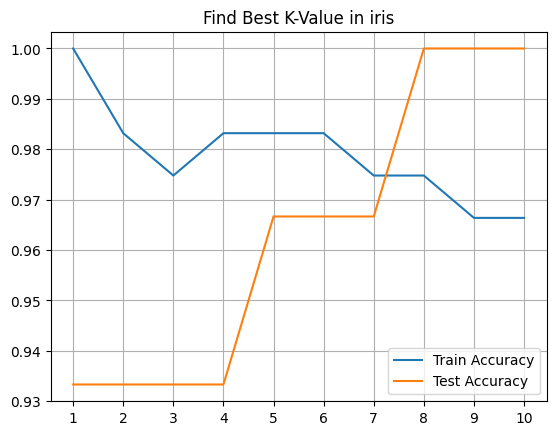

In [58]:
# 시각화

# x축 : k값 1~ 10
# y축 : train_score

# x축 : k값 1~ 10
# y축 : test_score

# 겹쳐진 그래프 plot, legend  라인그래프

plt.plot(k_range, train_score, label='Train Accuracy')
plt.plot(k_range, test_score, label='Test Accuracy')
plt.xticks(k_range)  # x축 눈금
plt.title('Find Best K-Value in iris')   #그래프제목
plt.legend()
plt.grid()
plt.show()

##### 1. 위스콘신 대학의 암데이터셋에 대한 데이터 분석을 진행하세요.
  - 0:정상/1:암
  - 모델링 및 평가지표를 제시하세요.
  - 모델들 중 가장 성능이 좋은 모델을 제시하세요.

In [59]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [60]:
cancer.data
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [61]:
cancer.data.shape

(569, 30)

In [62]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [63]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['Y'] = cancer.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [64]:
np.bincount(cancer.target)

array([212, 357])

In [65]:
#모델링
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [66]:
#평가
knn.score(X_train, y_train), knn.score(X_test, y_test)

(0.9831932773109243, 0.9666666666666667)

In [67]:
k_range = range(1, 11)
train_score1 = []
test_score1 = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    train_score1.append(model.score(X_train, y_train))
    test_score1.append(model.score(X_test, y_test))

print(train_score1)
print(test_score1)


[1.0, 0.9831932773109243, 0.9747899159663865, 0.9831932773109243, 0.9831932773109243, 0.9831932773109243, 0.9747899159663865, 0.9747899159663865, 0.9663865546218487, 0.9663865546218487]
[0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 1.0, 1.0, 1.0]


In [68]:
np.argmin(np.array(train_score1) - np.array(test_score1))

8

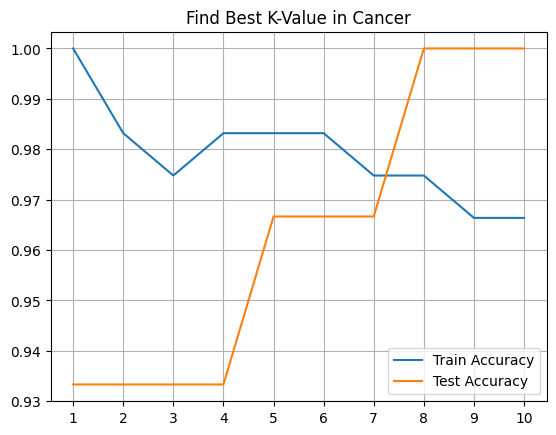

In [70]:
# 시각화

plt.plot(k_range, train_score1, label='Train Accuracy')
plt.plot(k_range, test_score1, label='Test Accuracy')
plt.xticks(k_range)
plt.title('Find Best K-Value in Cancer')
plt.legend()
plt.grid()
plt.show()

In [71]:
# k = 7 일때가 가장 성능이 좋다.

knn = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)

##### 2. 보스톤 집값 데이터셋에 대해 분석을 진행하세요.
- 모델링 및 평가지표를 제시하세요.


In [77]:
# 보스톤 집값 데이터셋
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])  #feature
target = raw_df.values[1::2, 2]     #Y값 (집값)

In [82]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [83]:
target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [84]:
data.shape  #nd array -> pandas

(506, 13)

In [85]:
##pandas 데이터 프레임으로 변경,
#컬럼명변경
df = pd.DataFrame(data=data,columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test ,y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=0)

In [87]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [88]:
#모델 & 학습
from sklearn.linear_model import LinearRegression

lr = LinearRegression() #모델정의  y= wx +b
lr.fit(X_train, y_train) #학습

LinearRegression()

In [89]:
#평가

lr.score(X_train, y_train), lr.score(X_test,y_test)

(0.7730135569264234, 0.5892223849182525)

In [92]:
#회귀계수

lr.coef_


array([-1.19443447e-01,  4.47799511e-02,  5.48526168e-03,  2.34080361e+00,
       -1.61236043e+01,  3.70870901e+00, -3.12108178e-03, -1.38639737e+00,
        2.44178327e-01, -1.09896366e-02, -1.04592119e+00,  8.11010693e-03,
       -4.92792725e-01])

In [93]:
lr.intercept_

38.091694926302296

In [94]:
#평가측도
#mse, rmse, mae

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(y_train,lr.predict(X_train)))  #mse
print(mean_squared_error(y_train,lr.predict(X_train),squared=False)) #rmse
print(mean_absolute_error(y_train,lr.predict(X_train))) #mae

19.326470203585725
4.396188144698282
3.1031563965794335
